# Linear Regression on Real Estate Problem

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
import sklearn.metrics
from sklearn.metrics import mean_squared_error,r2_score
import seaborn as sns

In [2]:
df = pd.read_excel('Linear Regression.xlsx')
df.head()

,price,sqft_living,bedrooms,bathrooms,floors
0,221900,1180,3,1.00,1.0
1,538000,2570,3,2.25,2.0
2,180000,770,2,1.00,1.0
3,604000,1960,4,3.00,1.0
4,510000,1680,3,2.00,1.0


In [3]:
df.describe()

,price,sqft_living,bedrooms,bathrooms,floors
count,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,2079.899736,3.370842,2.114757,1.494309
std,3.671272e+05,918.440897,0.930062,0.770163,0.539989
min,7.500000e+04,290.000000,0.000000,0.000000,1.000000
25%,3.219500e+05,1427.000000,3.000000,1.750000,1.000000
50%,4.500000e+05,1910.000000,3.000000,2.250000,1.500000
75%,6.450000e+05,2550.000000,4.000000,2.500000,2.000000
max,7.700000e+06,13540.000000,33.000000,8.000000,3.500000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016CE6EB7308>,
      dtype=object)

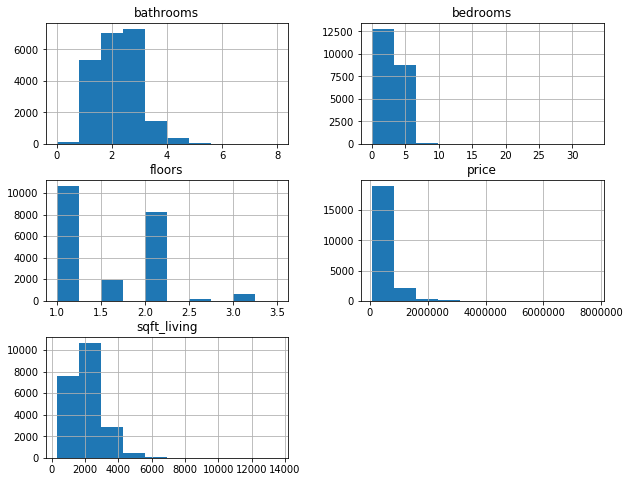

In [4]:
df.hist(figsize=(10,8))

In [5]:
df.corr()

,price,sqft_living,bedrooms,bathrooms,floors
price,1.000000,0.702035,0.308350,0.525138,0.256794
sqft_living,0.702035,1.000000,0.576671,0.754665,0.353949
bedrooms,0.308350,0.576671,1.000000,0.515884,0.175429
bathrooms,0.525138,0.754665,0.515884,1.000000,0.500653
floors,0.256794,0.353949,0.175429,0.500653,1.000000


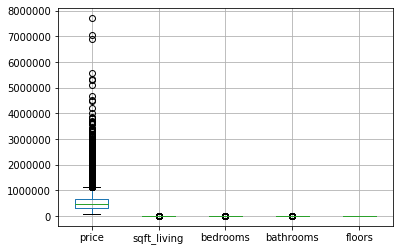

In [6]:
df.boxplot()

In [7]:
df.isnull()

,price,sqft_living,bedrooms,bathrooms,floors
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
21608,False,False,False,False,False
21609,False,False,False,False,False
21610,False,False,False,False,False
21611,False,False,False,False,False


In [8]:
df.dropna()

,price,sqft_living,bedrooms,bathrooms,floors
0,221900,1180,3,1.00,1.0
1,538000,2570,3,2.25,2.0
2,180000,770,2,1.00,1.0
3,604000,1960,4,3.00,1.0
4,510000,1680,3,2.00,1.0
...,...,...,...,...,...
21608,360000,1530,3,2.50,3.0
21609,400000,2310,4,2.50,2.0
21610,402101,1020,2,0.75,2.0
21611,400000,1600,3,2.50,2.0


In [9]:
Y = df.price
X = df[['sqft_living','bedrooms','bathrooms','floors']]

In [11]:
from sklearn.preprocessing import PolynomialFeatures
transformer = PolynomialFeatures(degree=2, include_bias=False)
transformer.fit(X)
x = transformer.transform(X)
x = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X)

In [12]:
x_train,x_test,Y_train,Y_test = train_test_split(x,Y,test_size=0.2,random_state=2)

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
lin_reg = LinearRegression()

In [15]:
lin_reg.fit(x_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
coeff_df = pd.DataFrame(lin_reg.coef_)
coeff_df

,0
0,80.005369
1,-27988.046282
2,5381.095102
3,-145367.752518
4,0.036320
5,-7.556771
6,16.166423
7,-4.680887
8,1691.453306
9,-20232.650149


In [20]:
lin_reg.intercept_

354429.0732344572

In [22]:
ypred = lin_reg.predict(x_test)
ypred

array([547735.01171822, 521574.2116794 , 400594.91301035, ...,
       630530.17881681, 300536.24686082, 418142.23173207])

In [23]:
RMSE = np.sqrt(mean_squared_error(Y_test,ypred))
r_square = r2_score(Y_test,ypred)
print("The R_squre value is   ",r_square)

The R_squre value is    0.49333554929488765


In [24]:
print("The RMSE value is =",RMSE)

The RMSE value is = 265959.5992436539


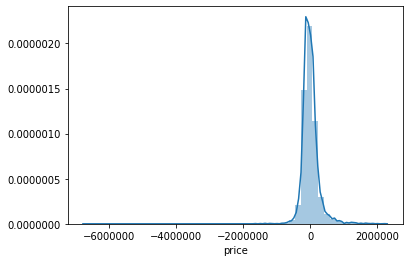

In [28]:
sns.distplot((Y_test-ypred),bins=50); 

In [26]:
import statsmodels.api as sm
x1 = sm.add_constant(x)
Logistics = sm.OLS(Y,x1)
result = Logistics.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.547
Model:                            OLS   Adj. R-squared:                  0.547
Method:                 Least Squares   F-statistic:                     1864.
Date:                Thu, 13 Aug 2020   Prob (F-statistic):               0.00
Time:                        14:41:10   Log-Likelihood:            -2.9904e+05
No. Observations:               21613   AIC:                         5.981e+05
Df Residuals:                   21598   BIC:                         5.982e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.234e+05   2.55e+04     12.693      0.0